<a href="https://colab.research.google.com/github/marcelo7bastos/mba_mcdia_est_desc_analise_pronaf/blob/main/mba_mcdia_est_desc_analise_pronaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final - Estatística Descritiva**


## **O acesso ao crédito do PRONAF resultou em melhoria nas condições econômicas dos agricultores familiares ao longo de 10 anos?**

O **PRONAF** (Programa Nacional de Fortalecimento da Agricultura Familiar) é um dos principais instrumentos de política pública para apoiar pequenos produtores no Brasil. Desde sua implementação, ele visa garantir acesso ao crédito, fomentar o crescimento e reduzir a vulnerabilidade econômica dos agricultores familiares.

# Preparação do Ambiente e Dados

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define o caminho da pasta onde os arquivos serão armazenados/recuperados
drive_folder = '/content/drive/MyDrive/ENAP_MBA_MCDIA/005_estatistica/trabalho_final/data'

# Parâmetros da análise
MODO_ANALISE = "amostra"  # Opções: "amostra", "nova_amostra", "populacao"
FRAC_AMOSTRA = 0.1  # 10% da base para amostragem

# Estrutura de decisão para carregar os dados
if MODO_ANALISE == "amostra":
    print("🔹 Carregando apenas uma amostra do dataset...")
    # Caminho para o arquivo de amostra já salvo no Google Drive
    arquivo_parquet = f"{drive_folder}/pronaf_amostra.parquet"
    df = pd.read_parquet(arquivo_parquet)

elif MODO_ANALISE == "populacao":
    print("🔹 Carregando a população completa (isso pode demorar)...")
    arquivo_parquet = f"{drive_folder}/pronaf.parquet"
    # Carrega o arquivo
    df = pd.read_parquet(arquivo_parquet)

else:
    raise ValueError("Modo de análise inválido! Escolha entre: 'amostra', 'nova_amostra' ou 'populacao'.")

# Exibir informações do dataset carregado
print(f"Número total de registros carregados: {df.shape[0]:,}".replace(",", "."))



🔹 Carregando apenas uma amostra do dataset...
Número total de registros carregados: 2.574.808


In [4]:
# Dicionário com as conversões recomendadas para cada variável
conversoes = {
    'REF_BACEN': 'str',  # Código identificador, manter como string
    'NU_ORDEM': 'str',  # Número de ordem, mas é um identificador também, manter string
    #'CNPJ_IF': 'str',  # Identificador de instituição financeira
    'DT_EMISSAO': 'datetime64[ns]',  # Data de emissão do contrato
    #'DT_VENCIMENTO': 'datetime64[ns]',  # Data de vencimento do contrato
    'CD_INST_CREDITO': 'str',  # Código da instituição financeira, manter string
    #'CD_CATEG_EMITENTE': 'str',  # Categoria do emitente
    'CD_FONTE_RECURSO': 'str',  # Código da fonte de recurso, manter string
    #'CNPJ_AGENTE_INVEST': 'str',  # Identificador do agente investidor
    'CD_ESTADO': 'str',  # Código de estado (UF), manter string
    #'CD_REF_BACEN_INVESTIMENTO': 'str',  # Código de referência Bacen para investimento
    #'CD_TIPO_SEGURO': 'str',  # Código do tipo de seguro
    #'CD_EMPREENDIMENTO': 'str',  # Código do empreendimento
    'CD_PROGRAMA': 'str',  # Código do programa de crédito
    #'CD_TIPO_ENCARG_FINANC': 'str',  # Tipo de encargo financeiro
    #'CD_TIPO_IRRIGACAO': 'str',  # Tipo de irrigação utilizada
    #'CD_TIPO_AGRICULTURA': 'str',  # Tipo de agricultura praticada
    'CD_FASE_CICLO_PRODUCAO': 'str',  # Fase do ciclo de produção, manter string
    #'CD_TIPO_CULTIVO': 'str',  # Tipo de cultivo agrícola
    #'CD_TIPO_INTGR_CONSOR': 'str',  # Tipo de integração consorciada
    #'CD_TIPO_GRAO_SEMENTE': 'str',  # Tipo de grão/semente plantado
    #'VL_ALIQ_PROAGRO': 'float64',  # Percentual de alíquota Proagro
    'VL_JUROS': 'float64',  # Taxa de juros, valor decimal
    #'VL_PRESTACAO_INVESTIMENTO': 'float64',  # Valor da prestação de investimento
    #'VL_PREV_PROD': 'float64',  # Valor previsto da produção
    #'VL_QUANTIDADE': 'float64',  # Quantidade financiada
    #'VL_RECEITA_BRUTA_ESPERADA': 'float64',  # Receita bruta esperada
    'VL_PARC_CREDITO': 'float64',  # Valor da parcela de crédito
    #'VL_REC_PROPRIO': 'float64',  # Receita própria do produtor
    #'VL_PERC_RISCO_STN': 'float64',  # Percentual de risco do STN
    #'VL_PERC_RISCO_FUNDO_CONST': 'float64',  # Percentual de risco do fundo
    #'VL_REC_PROPRIO_SRV': 'float64',  # Receita própria de serviço
    #'VL_AREA_FINANC': 'float64',  # Área financiada em hectares
    'CD_SUBPROGRAMA': 'str',  # Código do subprograma de financiamento
    #'VL_PRODUTIV_OBTIDA': 'float64',  # Produtividade obtida na lavoura
    #'DT_FIM_COLHEITA': 'datetime64[ns]',  # Data fim da colheita
    #'DT_FIM_PLANTIO': 'datetime64[ns]',  # Data fim do plantio
    #'DT_INIC_COLHEITA': 'datetime64[ns]',  # Data início da colheita
    #'DT_INIC_PLANTIO': 'datetime64[ns]',  # Data início do plantio
    #'VL_JUROS_ENC_FINAN_POSFIX': 'float64',  # Juros pós-fixados
    #'VL_PERC_CUSTO_EFET_TOTAL': 'float64',  # Percentual de custo efetivo total
    #'CD_CONTRATO_STN': 'str',  # Código do contrato STN
    #'CD_CNPJ_CADASTRANTE': 'str',  # CNPJ do cadastrante
    'VL_AREA_INFORMADA': 'float64',  # Área informada em hectares
    #'CD_CICLO_CULTIVAR': 'str',  # Ciclo da cultivar (curto, médio, longo)
    #'CD_TIPO_SOLO': 'str',  # Tipo de solo utilizado
    #'PC_BONUS_CAR': 'float64',  # Percentual de bônus CAR
    #'MES': 'Int64',  # Número do mês
    #'SEMESTRE': 'Int64',  # Número do semestre
    'ANO': 'Int64',  # Ano do financiamento
    #'SAFRA': 'str',  # Safra agrícola
    #'PROGRAMA_DESCRICAO': 'str',  # Descrição do programa
    #'CD_IBGE_MUNICIPIO': 'str',  # Código IBGE do município
    'CD_CPF_CNPJ': 'str',  # CPF/CNPJ do tomador de crédito
    'SEXO_BIOLOGICO': 'category'  # Masculino ou Feminino
    #'CD_DAP': 'str', #'Código do DAP'
}

# Filtrar apenas as colunas de interesse
df = df[list(conversoes.keys())]

# Aplicar conversão ao DataFrame
df = df.astype(conversoes)

# Exibir tipos para conferir a conversão
print(df.dtypes)

REF_BACEN                         object
NU_ORDEM                          object
DT_EMISSAO                datetime64[ns]
CD_INST_CREDITO                   object
CD_FONTE_RECURSO                  object
CD_ESTADO                         object
CD_PROGRAMA                       object
CD_FASE_CICLO_PRODUCAO            object
VL_JUROS                         float64
VL_PARC_CREDITO                  float64
CD_SUBPROGRAMA                    object
VL_AREA_INFORMADA                float64
ANO                                Int64
CD_CPF_CNPJ                       object
SEXO_BIOLOGICO                  category
dtype: object


# Análise Preliminar e Limpeza dos Dados

## Tratamento do Valor do Crédito

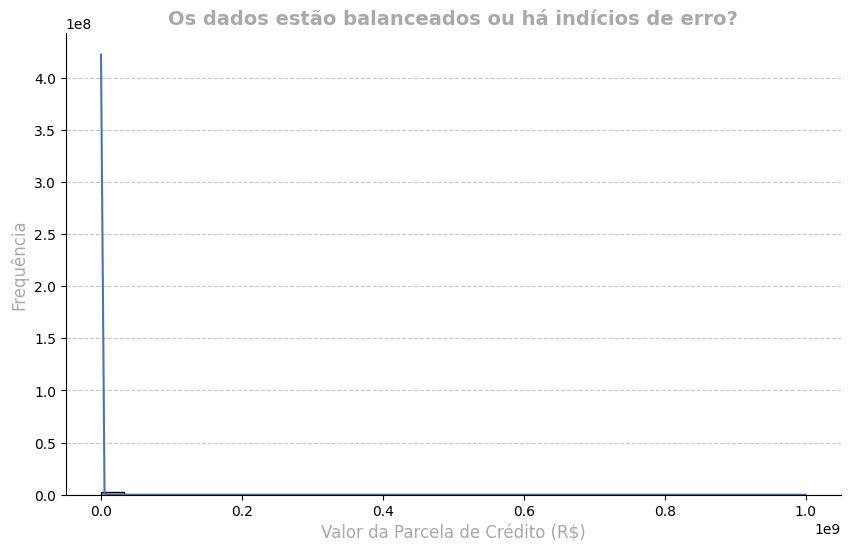

In [5]:
# Criar histograma
plt.figure(figsize=(10, 6))

# Criar histograma com bins ajustados e escala logarítmica se necessário
sns.histplot(df['VL_PARC_CREDITO'], bins=30, kde=True, color='#4C72B0')

# Ajustando o título com uma pergunta instigante
plt.title("Os dados estão balanceados ou há indícios de erro?", fontsize=14, color='darkgray', weight='bold')

# Ajustando rótulos dos eixos
plt.xlabel("Valor da Parcela de Crédito (R$)", fontsize=12, color='darkgray')
plt.ylabel("Frequência", fontsize=12, color='darkgray')

# Remover bordas desnecessárias
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Se os dados forem muito assimétricos, pode-se aplicar escala logarítmica no eixo X
#plt.xscale("log")  # Se necessário para melhor visualização dos dados

# Melhorar grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


In [6]:
# Top 10 maiores valores de VL_PARC_CREDITO
df.nlargest(10, 'VL_PARC_CREDITO')

,REF_BACEN,NU_ORDEM,DT_EMISSAO,CD_INST_CREDITO,CD_FONTE_RECURSO,CD_ESTADO,CD_PROGRAMA,CD_FASE_CICLO_PRODUCAO,VL_JUROS,VL_PARC_CREDITO,CD_SUBPROGRAMA,VL_AREA_INFORMADA,ANO,CD_CPF_CNPJ,SEXO_BIOLOGICO
22426591,516432167,1,2023-08-21,5,0430,MT,0999,00,11.37,1.000000e+09,None,0.0,2023,None,NaN
11410484,506096200,1,2017-12-29,8,0303,SC,0999,00,6.60,5.000000e+08,None,0.0,2017,None,NaN
22257137,516273490,1,2023-08-02,5,0430,PR,0999,00,10.87,4.000000e+08,None,NaN,2023,None,NaN
22171896,516195120,1,2023-07-25,1,0430,MT,0999,00,10.60,4.000000e+08,None,0.0,2023,None,NaN
21619501,515650237,1,2023-04-06,5,0430,GO,0999,00,1.10,2.500000e+08,None,NaN,2023,None,NaN
19558213,513632673,1,2022-03-25,4,0430,PR,0999,00,12.99,2.400000e+08,None,NaN,2022,None,NaN
14056912,508479703,1,2019-06-10,1,0201,PR,0999,00,6.50,2.000000e+08,None,NaN,2019,None,NaN
23719370,517564564,1,2024-03-12,4,0201,GO,0999,00,9.50,2.000000e+08,None,NaN,2024,None,NaN
24324588,518106713,1,2024-06-17,1,0430,PR,0999,00,12.63,2.000000e+08,None,0.0,2024,None,NaN
20251318,514331235,1,2022-08-01,5,0430,PR,0999,00,14.73,2.000000e+08,None,NaN,2022,None,NaN


In [7]:
# Os 10 menores valores de VL_PARC_CREDITO
df.nsmallest(10, 'VL_PARC_CREDITO')

,REF_BACEN,NU_ORDEM,DT_EMISSAO,CD_INST_CREDITO,CD_FONTE_RECURSO,CD_ESTADO,CD_PROGRAMA,CD_FASE_CICLO_PRODUCAO,VL_JUROS,VL_PARC_CREDITO,CD_SUBPROGRAMA,VL_AREA_INFORMADA,ANO,CD_CPF_CNPJ,SEXO_BIOLOGICO
3365895,3255093,2,2014-04-24,1,0502,AL,0999,00,7.65,0.0,None,1.00,2014,34275533453,Masculino
3469577,3353731,2,2014-05-12,1,0301,PR,0999,22,5.50,0.0,None,1.38,2014,00470204907,Masculino
309503,239951,2,2013-02-21,1,0201,PR,0050,22,5.00,0.0,None,4.92,2013,11918730997,Masculino
2082971,2002014,2,2013-10-07,2,0502,BA,0999,00,7.00,0.0,None,17.00,2013,24392332934,Masculino
7433588,7022475,1,2015-11-19,5,0502,SE,0999,00,7.65,0.0,None,0.00,2015,19862768568,Masculino
1305881,1171752,1,2013-07-17,1,0502,MG,0999,00,7.00,0.0,None,180.00,2013,02390057675,Masculino
4916855,4740905,2,2014-10-30,5,0505,RS,0001,00,2.00,0.0,None,0.00,2014,91434670082,Feminino
3629635,3509454,3,2014-06-03,3,0201,PR,0999,22,5.50,0.0,None,5.93,2014,03910632947,Masculino
2990295,2871065,4,2014-02-13,2,0502,MA,0999,00,8.00,0.0,None,0.00,2014,05482887391,Masculino
3689596,3566069,4,2014-06-12,2,0502,PI,0999,00,5.30,0.0,None,3.00,2014,90050460315,Feminino


## Remoção de dados incorretos e ouliers

In [8]:
# Remover os valores iguais a 0 reais
print(f"Quantidade de valores iguais a zero: {df['VL_PARC_CREDITO'].eq(0).sum()}")

df = df[df['VL_PARC_CREDITO'] > 0]

Quantidade de valores iguais a zero: 17


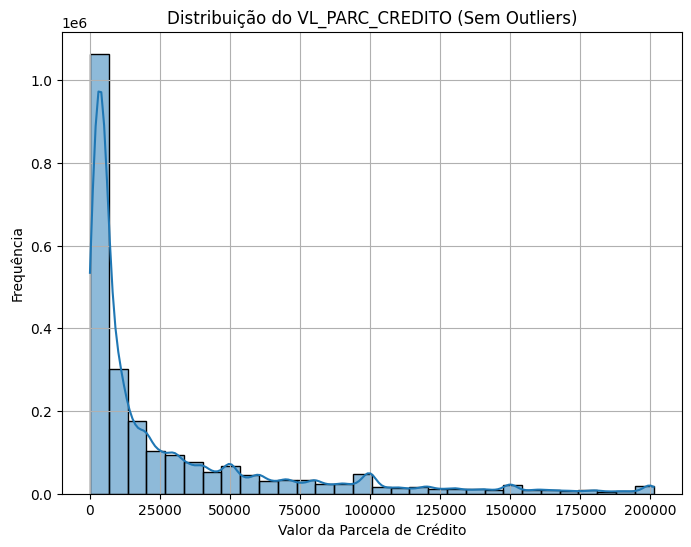

Número de registros originais: 2.574.791
Número de registros após remoção de outliers: 2.341.570
Outliers removidos: 233.221


In [9]:
# Auxiliar a identificar a distribuição paramétrica dos dados removendo outliers

# Calcular quartis e IQR (Intervalo Interquartil)
Q1 = np.percentile(df['VL_PARC_CREDITO'], 25)
Q3 = np.percentile(df['VL_PARC_CREDITO'], 75)
IQR = Q3 - Q1

# Definir limites para detecção de outliers
limite_inferior = Q1 - 3 * IQR
limite_superior = Q3 + 3 * IQR

# Filtrar dados dentro dos limites
df_tratado = df[(df['VL_PARC_CREDITO'] >= limite_inferior) &
                             (df['VL_PARC_CREDITO'] <= limite_superior)]

# Criar histograma após remoção dos outliers
plt.figure(figsize=(8, 6))
sns.histplot(df_tratado['VL_PARC_CREDITO'], bins=30, kde=True)  # kde=True para curva de densidade

# Personalizar o gráfico
plt.title("Distribuição do VL_PARC_CREDITO (Sem Outliers)")
plt.xlabel("Valor da Parcela de Crédito")
plt.ylabel("Frequência")
plt.grid(True)

# Exibir gráfico
plt.show()

# Exibir quantidade de valores removidos formatados no padrão brasileiro
print(f"Número de registros originais: {df.shape[0]:,}".replace(",", "."))
print(f"Número de registros após remoção de outliers: {df_tratado.shape[0]:,}".replace(",", "."))
print(f"Outliers removidos: {df.shape[0] - df_tratado.shape[0]:,}".replace(",", "."))


## Garantindo os tipos corretos nas variáveis de interesse

In [43]:
df['VL_PARC_CREDITO'] = pd.to_numeric(df['VL_PARC_CREDITO'], errors='coerce')

# Crédito Rural no Brasil


In [51]:
# Criar um novo DataFrame com os dados de Crédito Rural Contendo as colunas ANO, CD_CPF_CNPJ, CD_PROGRAMA, VL_PARC_CREDITO,
df_credito_rural = df[['ANO', 'CD_CPF_CNPJ', 'CD_PROGRAMA', 'VL_PARC_CREDITO']]
#df_credito_rural.dtypes

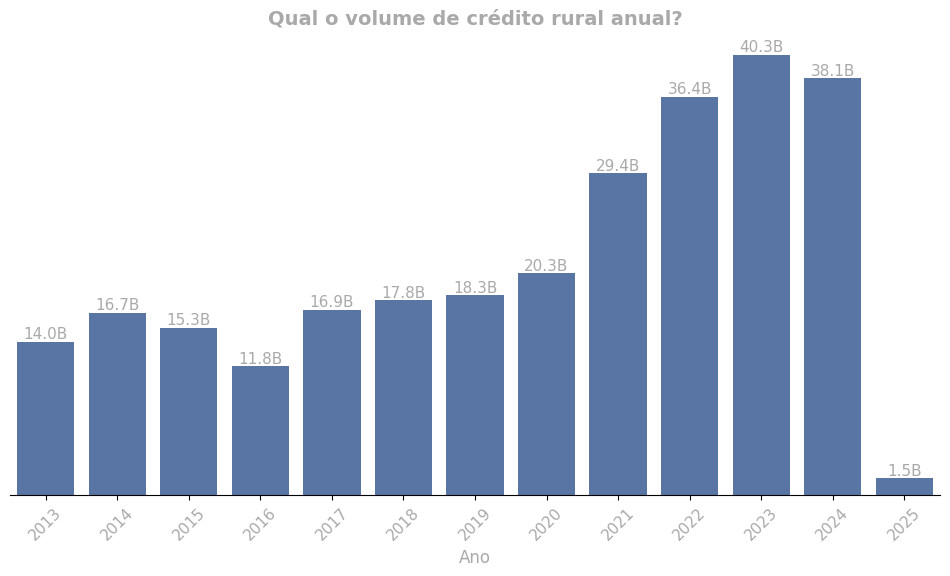

In [52]:
# Criar gráfico de barras com o valor total de crédito rural por ano
plt.figure(figsize=(12, 6))

# Criando o gráfico de barras
ax = sns.barplot(data=df_credito_rural, x='ANO', y='VL_PARC_CREDITO', estimator=sum, errorbar=None, color='#4C72B0')

# Ajustando o título e subtítulo
plt.title('Qual o volume de crédito rural anual?', fontsize=14, color='darkgray', weight='bold')

# Ajustando os rótulos dos eixos
plt.xlabel('Ano', fontsize=12, color='darkgray')
plt.ylabel(None)  # Remove o nome do eixo Y

# Removendo a barra do eixo Y
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([])  # Remove os valores numéricos do eixo Y

# Convertendo os valores para bilhões e adicionando rótulos no topo das barras
for p in ax.patches:
    height = p.get_height() / 1e9  # Convertendo para bilhões
    ax.annotate(f'{height:.1f}B',  # Formato com uma casa decimal
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11, color='darkgray')

# Ajustando os ticks do eixo X
plt.xticks(rotation=45, fontsize=11, color='darkgray')

# Exibir o gráfico
plt.show()


## Crédito Rural para Agricultura Familiar

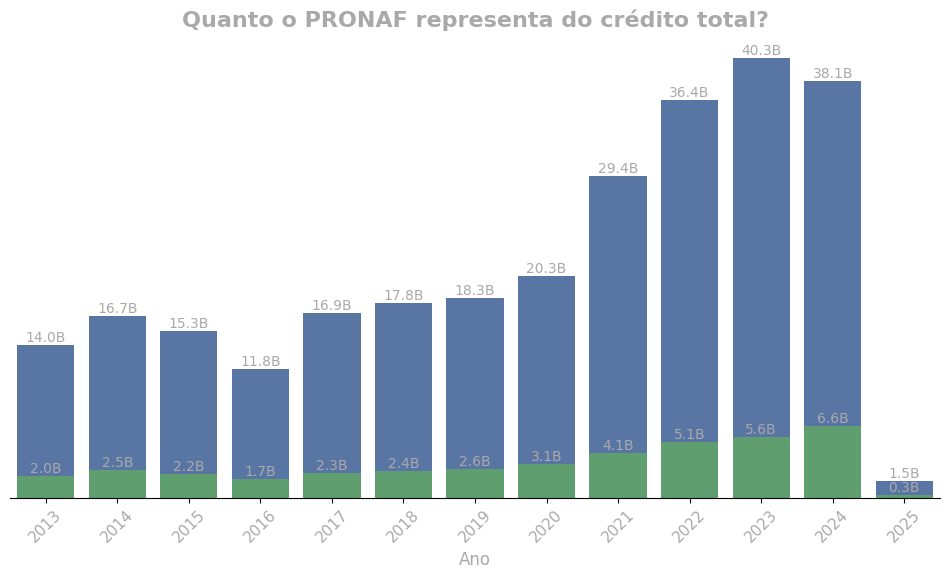

In [55]:
# Criar agregação do total de crédito por ano
credito_total = df_credito_rural.groupby('ANO')['VL_PARC_CREDITO'].sum().reset_index()
# Filtrar os dados para o programa específico (CD_PROGRAMA = '0001')
df_programa_0001 = df_credito_rural[df_credito_rural['CD_PROGRAMA'] == '0001']
credito_programa_0001 = df_programa_0001.groupby('ANO')['VL_PARC_CREDITO'].sum().reset_index()

# Criar gráfico
plt.figure(figsize=(12, 6))

# Criando barras para o crédito total
sns.barplot(data=credito_total, x='ANO', y='VL_PARC_CREDITO', color='#4C72B0', label='Crédito Total')

# Criando barras para o crédito do programa 0001
sns.barplot(data=credito_programa_0001, x='ANO', y='VL_PARC_CREDITO', color='#55A868', label='Crédito Programa 0001')

# Ajustando título
plt.title('Quanto o PRONAF representa do crédito total?', fontsize=16, color='darkgray', weight='bold')

# Ajustando rótulos dos eixos
plt.xlabel('Ano', fontsize=12, color='darkgray')
plt.ylabel(None)  # Remove nome do eixo Y

# Removendo a barra e os números do eixo Y
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([])

# Adicionando valores no topo das barras (convertendo para bilhões)
for p in ax.patches:
    height = p.get_height() / 1e9  # Convertendo para bilhões
    if height > 0:  # Evitar anotações em valores zerados
        ax.annotate(f'{height:.1f}B',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='darkgray')

# **Remover a legenda padrão do Seaborn**
plt.legend().remove()

# Ajustando rótulos do eixo X
plt.xticks(rotation=45, fontsize=11, color='darkgray')

# Exibir o gráfico
plt.show()

     ANO    VL_PARC_CREDITO  percentual_programa_0001
0   2013 13994971273.850000                 14.380860
1   2014 16675551780.170000                 15.091209
2   2015 15310709459.889999                 14.260553
3   2016 11789850817.290001                 14.611899
4   2017 16936896244.700001                 13.297088
5   2018 17798491357.250000                 13.657712
6   2019 18276218729.070000                 14.435480
7   2020 20286175229.500000                 15.461407
8   2021 29443857276.610001                 13.808558
9   2022 36445873469.360001                 13.973811
10  2023 40270802365.559998                 13.838743
11  2024 38125990795.760002                 17.220572
12  2025  1513658507.030000                 19.182602


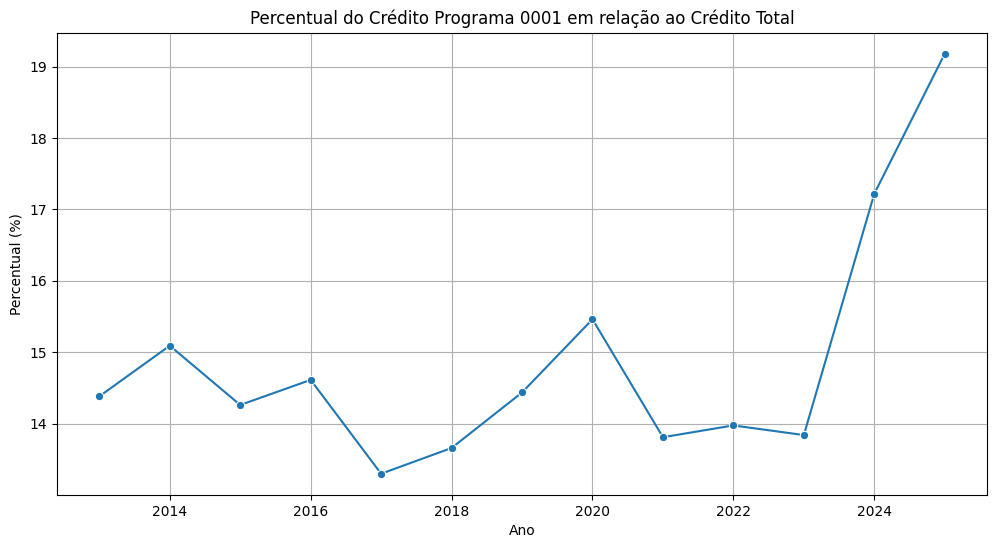

In [56]:
# prompt: Qual é o percentual de credito_programa_0001 em relação ao credito_total

import matplotlib.pyplot as plt
# Calculate the percentage of credito_programa_0001 relative to credito_total for each year
credito_total['percentual_programa_0001'] = (credito_programa_0001['VL_PARC_CREDITO'] / credito_total['VL_PARC_CREDITO']) * 100

# Print the resulting DataFrame
print(credito_total)

# You can also plot this percentage if needed:
plt.figure(figsize=(12, 6))
sns.lineplot(data=credito_total, x='ANO', y='percentual_programa_0001', marker='o')
plt.title('Percentual do Crédito Programa 0001 em relação ao Crédito Total')
plt.xlabel('Ano')
plt.ylabel('Percentual (%)')
plt.grid(True)
plt.show()
